## Red recurrente para predicción del número de infracciones


### Iván López de Munain Quintana

In [65]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN 
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
import pandas as pd
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

## Simple RNN

In [90]:
#Funciones proporcionadas en clase

# Calculates a successfull ratio using less relative error than a maximum criterium
def porcentaje_margen(y_true, y_pred):
    margen = 0.15
    yy = K.sum(K.cast(K.less(K.abs((y_pred/y_true)-1.0), margen), dtype=float))
    return yy/K.cast(K.shape(y_pred)[0], dtype=float)

# Division of a global sequences into n_step size ones (X) with the corresponding prediction desired y
def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        #find the end of othis pattern
        end_ix = i+n_steps
        #check if we are beyond the sequence 
        if end_ix > len(sequence)-1:  #Cuando no puede mas, se acaba
            break
        #gather input and output parts of the pattern
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [91]:
tabla_historico=pd.read_excel('datos15-19.xlsx')
print(tabla_historico)

infr=minmax_scale(tabla_historico['Infracciones'])

     Unnamed: 0  Infracciones  Cuatrimestre   Año
0             1        131219             1  2015
1             2         14641             1  2015
2             3          9778             1  2015
3             4         17011             1  2015
4             5         36013             1  2015
..          ...           ...           ...   ...
413         414          8946             3  2019
414         415         24570             3  2019
415         416          2277             3  2019
416         417          1354             3  2019
417         418          1547             3  2019

[418 rows x 4 columns]


In [95]:

#Tamaño de las secuencias, en nuestro caso por trimestre cada comunidad
T=19 

# numero de caracteristicas
n_features=1

#conjunto X (19 observaciones por serie)
# observacion y (ultimo valor de cada serie)
x,y=split_sequence(tabla_historico['Infracciones'],T)

#Para normalizar entre [0,15]
#x=x/15
#y=y/15

x=x.reshape(x.shape[0], x.shape[1],1)


#Train y test
#desordeno aleatoriamente los indices y cojo 2/3 para entrenamiento y 1/3 para test
indices=np.arange(y.shape[0],dtype=int)
np.random.shuffle(indices)
train=indices[0:int(y.shape[0]*2/3)]
test=indices[int(y.shape[0]*2/3):]

#train=np.arange(0,304,dtype=int)
#test=np.arange(305,y.shape[0],dtype=int)

#Entrenamiento y validación
SRNN = Sequential()
SRNN.add(SimpleRNN(input_shape=(T,n_features),units=30,activation='relu',return_sequences=True))
SRNN.add(SimpleRNN(10,return_sequences=True,activation="relu"))
SRNN.add(SimpleRNN(5,return_sequences=False,activation="relu"))

#Capa de salida de un perceptrón multicapa
SRNN.add(Dense(1)) 

SRNN.compile(optimizer="adam",loss="mse",metrics=[porcentaje_margen])

history=SRNN.fit(x[train], y[train], epochs=100, verbose=1, validation_data=(x[test],y[test]))


Train on 266 samples, validate on 133 samples
Epoch 1/100
266/266 [==============================] - 11s 43ms/step - loss: 2513202664.9023 - porcentaje_margen: 0.0714 - val_loss: 2836596407.8195 - val_porcentaje_margen: 0.0602
Epoch 2/100
266/266 [==============================] - 2s 7ms/step - loss: 2368824041.8647 - porcentaje_margen: 0.0414 - val_loss: 2614522600.7820 - val_porcentaje_margen: 0.0902
Epoch 3/100
266/266 [==============================] - 2s 9ms/step - loss: 2178675184.6015 - porcentaje_margen: 0.1015 - val_loss: 2307369755.4286 - val_porcentaje_margen: 0.1053
Epoch 4/100
266/266 [==============================] - 2s 9ms/step - loss: 1883405954.8872 - porcentaje_margen: 0.0789 - val_loss: 1821111006.4962 - val_porcentaje_margen: 0.0376
Epoch 5/100
266/266 [==============================] - 2s 9ms/step - loss: 1466368535.0977 - porcentaje_margen: 0.0827 - val_loss: 1320967554.0451 - val_porcentaje_margen: 0.0827
Epoch 6/100
266/266 [==============================] - 2s

266/266 [==============================] - 2s 8ms/step - loss: 26495780.7143 - porcentaje_margen: 0.5188 - val_loss: 39496442.9850 - val_porcentaje_margen: 0.6015
Epoch 48/100
266/266 [==============================] - 2s 8ms/step - loss: 25953302.3684 - porcentaje_margen: 0.5564 - val_loss: 39500083.8872 - val_porcentaje_margen: 0.5639
Epoch 49/100
266/266 [==============================] - 2s 7ms/step - loss: 25049975.8195 - porcentaje_margen: 0.5714 - val_loss: 64090255.6842 - val_porcentaje_margen: 0.3609
Epoch 50/100
266/266 [==============================] - 2s 9ms/step - loss: 67497990.7143 - porcentaje_margen: 0.4474 - val_loss: 57608129.6241 - val_porcentaje_margen: 0.4812
Epoch 51/100
266/266 [==============================] - 3s 11ms/step - loss: 46492043.6692 - porcentaje_margen: 0.4323 - val_loss: 93292142.2857 - val_porcentaje_margen: 0.3835
Epoch 52/100
266/266 [==============================] - 4s 14ms/step - loss: 65454286.9173 - porcentaje_margen: 0.4211 - val_loss: 1

266/266 [==============================] - 3s 11ms/step - loss: 32287450.4060 - porcentaje_margen: 0.4586 - val_loss: 28799616.0752 - val_porcentaje_margen: 0.6391
Epoch 94/100
266/266 [==============================] - 3s 13ms/step - loss: 31250083.0075 - porcentaje_margen: 0.5414 - val_loss: 59229994.4662 - val_porcentaje_margen: 0.4737
Epoch 95/100
266/266 [==============================] - 2s 9ms/step - loss: 42301892.4286 - porcentaje_margen: 0.4850 - val_loss: 30065900.2782 - val_porcentaje_margen: 0.6090
Epoch 96/100
266/266 [==============================] - 2s 9ms/step - loss: 30366629.5338 - porcentaje_margen: 0.5827 - val_loss: 53897927.3985 - val_porcentaje_margen: 0.4511
Epoch 97/100
266/266 [==============================] - 2s 9ms/step - loss: 26425999.9398 - porcentaje_margen: 0.5564 - val_loss: 32447794.9662 - val_porcentaje_margen: 0.6015
Epoch 98/100
266/266 [==============================] - 2s 9ms/step - loss: 23541780.4586 - porcentaje_margen: 0.5752 - val_loss: 2

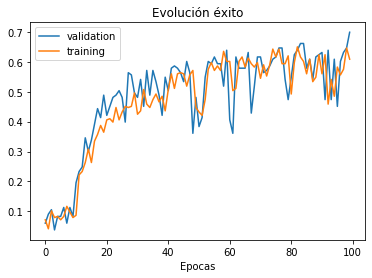

In [96]:
plt.plot(history.epoch,history.history['val_porcentaje_margen'],label='validation')
plt.plot(history.epoch,history.history['porcentaje_margen'],label="training")
plt.legend()
plt.title('Evolución éxito')
plt.xlabel('Epocas')
plt.show()